# Parsing XML to dataframes


In [1]:
from xmlToDataframe import *

In [2]:
rpi_posts = postsToDataframe('raspberrypi.stackexchange.com/Posts.xml')
magento_posts = postsToDataframe('magento.stackexchange.com/Posts.xml')
gardening_posts = postsToDataframe('gardening.stackexchange.com/Posts.xml')
health_posts = postsToDataframe('health.stackexchange.com/Posts.xml')
aviation_posts = postsToDataframe('aviation.stackexchange.com/Posts.xml')

In [3]:
rpi_comments = commentsToDataframe('raspberrypi.stackexchange.com/Comments.xml')
magento_comments = commentsToDataframe('magento.stackexchange.com/Comments.xml')
gardening_comments = commentsToDataframe('gardening.stackexchange.com/Comments.xml')
health_comments = commentsToDataframe('health.stackexchange.com/Comments.xml')
aviation_comments = commentsToDataframe('aviation.stackexchange.com/Comments.xml')

In [4]:
rpi_users = usersToDataframe('raspberrypi.stackexchange.com/Users.xml')
magento_users  = usersToDataframe('magento.stackexchange.com/Users.xml')
gardening_users  = usersToDataframe('gardening.stackexchange.com/Users.xml')
health_users  = usersToDataframe('health.stackexchange.com/Users.xml')
aviation_users  = usersToDataframe('aviation.stackexchange.com/Users.xml')

In [5]:
#df.to_csv('sample_filename.csv')

<br><br>

# Posts distribution in working days and weekend

In [6]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.lines import Line2D



In [7]:

def drawHistogram(df, title, y_axis, x_axis, year):
    #data
    n = 366 if isLeap(year) else 365
    df = pd.DataFrame(pd.to_datetime(df['CreationDate']).dt.date)
    df.columns = ['Date']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'].dt.year == year]
    df['workday'] = True
    non_working = df[df['Date'].dt.dayofweek >=5]
    working = df[df['Date'].dt.dayofweek <5]

    #plots
    fig, ax = plt.subplots()
    workday = sns.histplot(working, x = 'Date', bins = n)
    weekend = sns.histplot(non_working, x = 'Date', bins = n, color = 'crimson')
    ax.set(xlabel=x_axis, ylabel=y_axis)

    #legend
    a= plt.Line2D([], [], color='crimson', label='weekend')
    b = plt.Line2D([], [], color='lightblue', label='working days')
    plt.legend(handles=[a, b])
    plt.title(title, fontsize=18,)
    sns.set(rc={"figure.figsize":(24, 8)})

<br><br>

## raspberrypi.stack.exchange

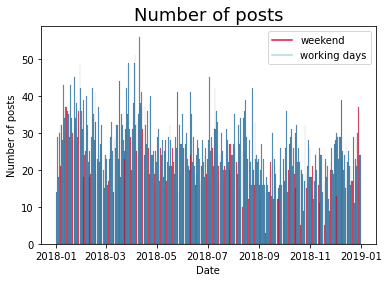

In [8]:
drawHistogram(rpi_posts, 'Number of posts', 'Number of posts', 'Date',2018)

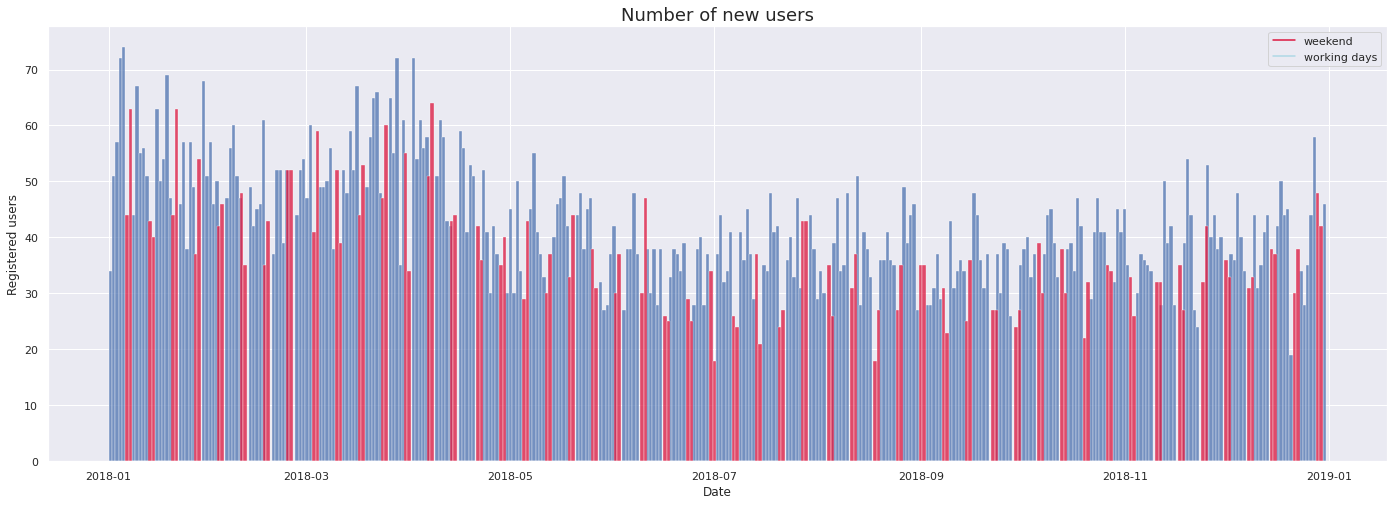

In [9]:
drawHistogram(rpi_users, 'Number of new users', 'Registered users', 'Date',2018)

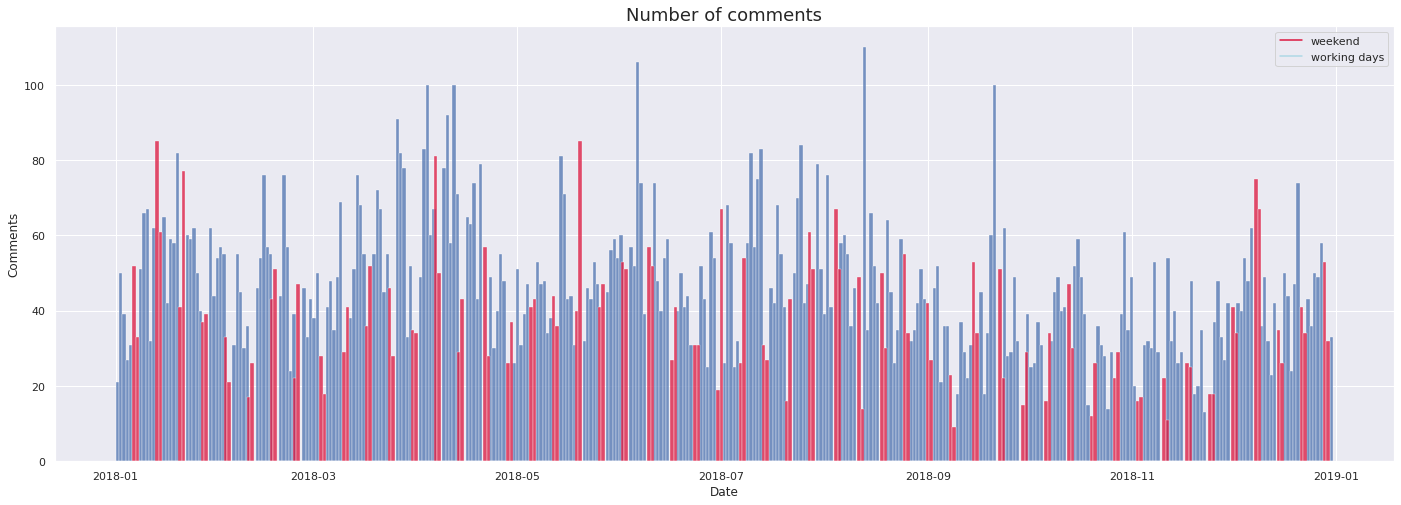

In [10]:
drawHistogram(rpi_comments, 'Number of comments', 'Comments', 'Date',2018)

<br><br>

## magento.stack.exchange

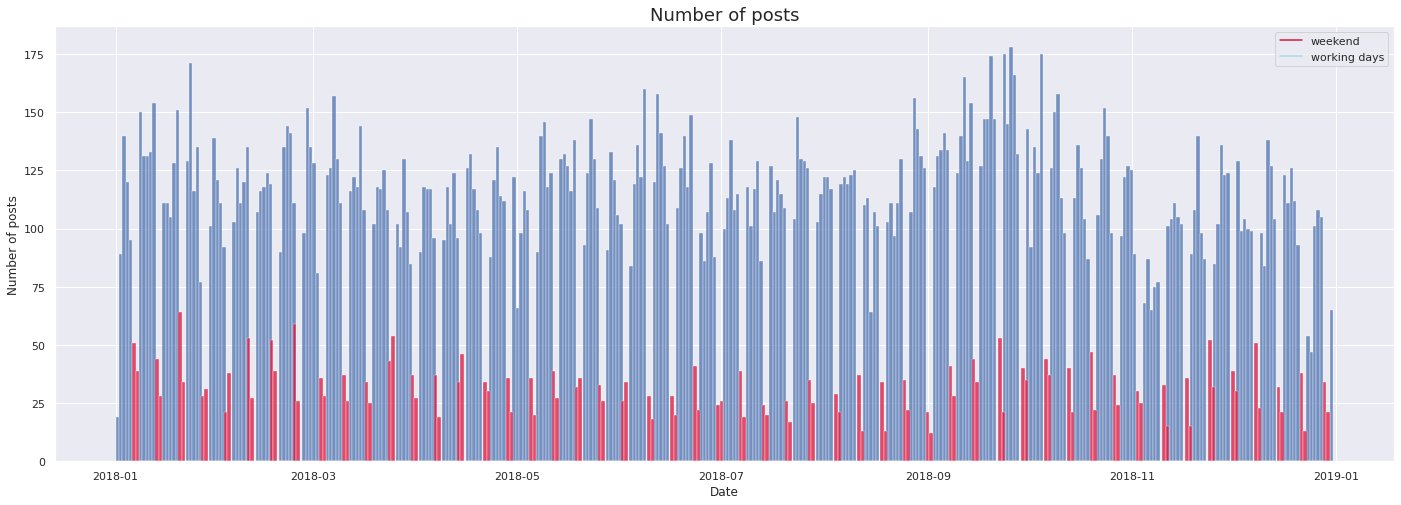

In [11]:
drawHistogram(magento_posts, "Number of posts", 'Number of posts', 'Date',2018)

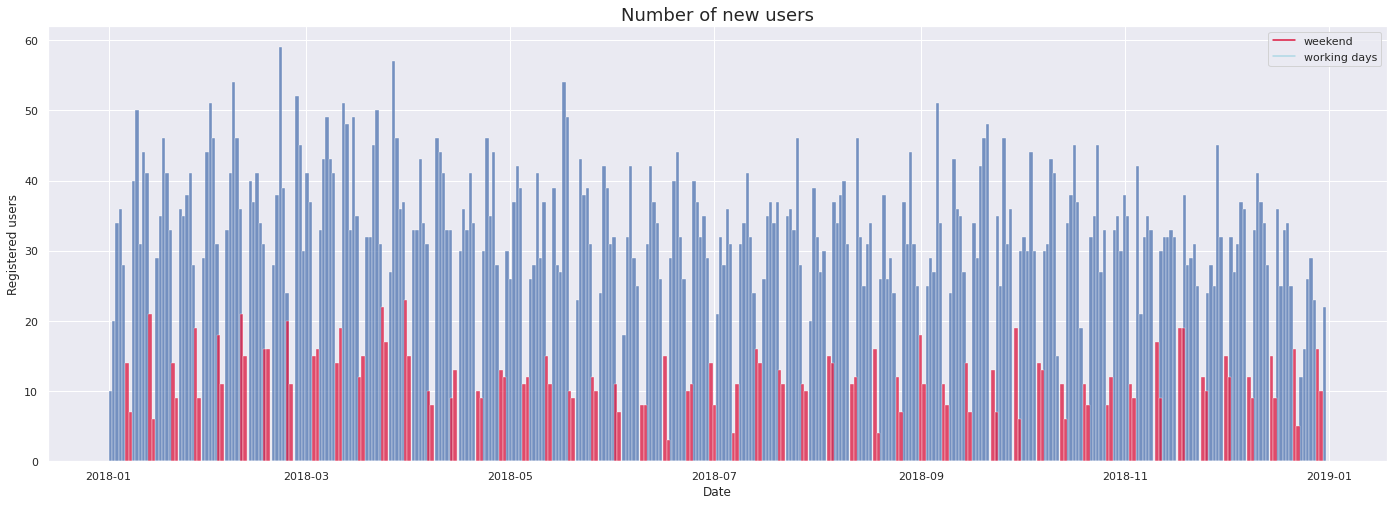

In [12]:
drawHistogram(magento_users, "Number of new users", 'Registered users', 'Date',2018)

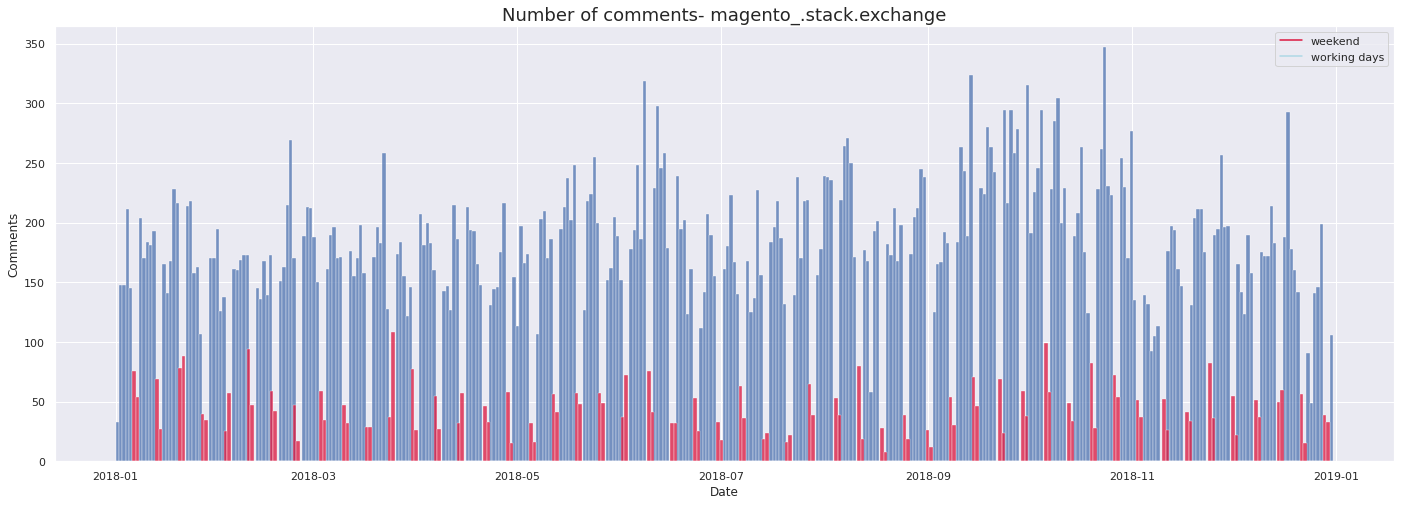

In [13]:
drawHistogram(magento_comments, "Number of comments- magento_.stack.exchange", 'Comments', 'Date',2018)

<br><br>

### gardening.stack.exchange

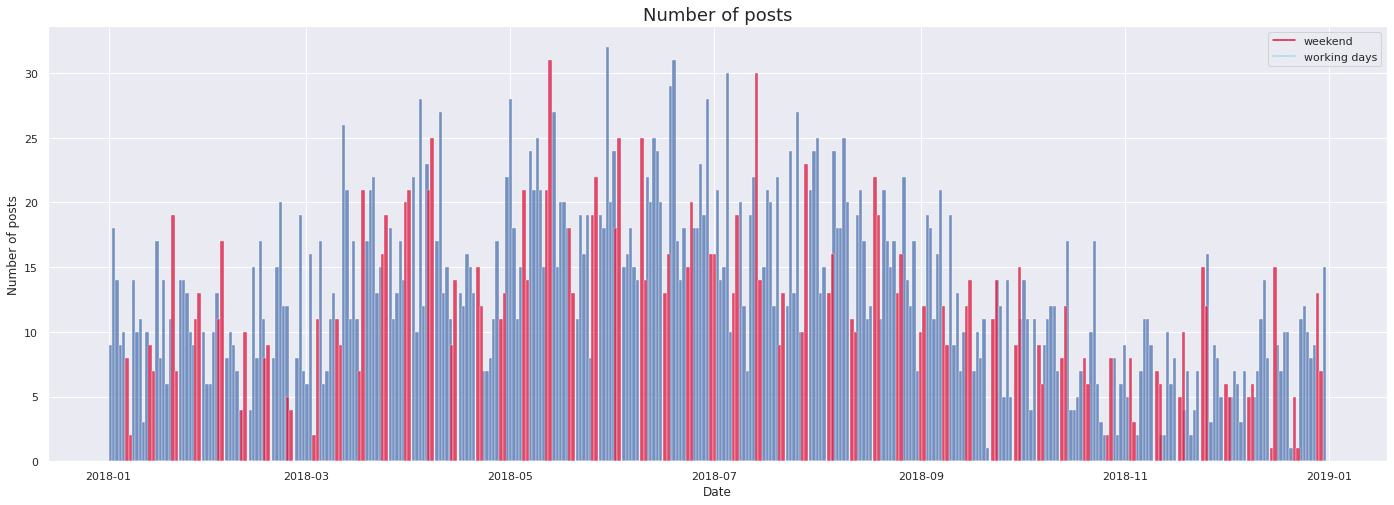

In [14]:
drawHistogram(gardening_posts, 'Number of posts', 'Number of posts', 'Date',2018)

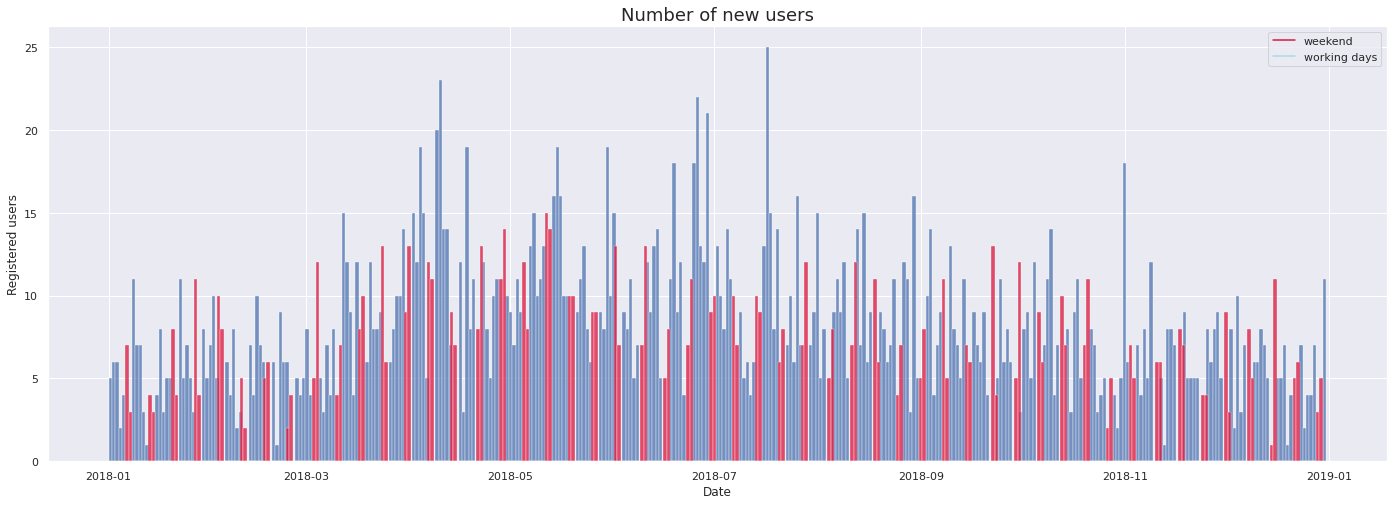

In [15]:
drawHistogram(gardening_users, 'Number of new users', 'Registered users', 'Date',2018)

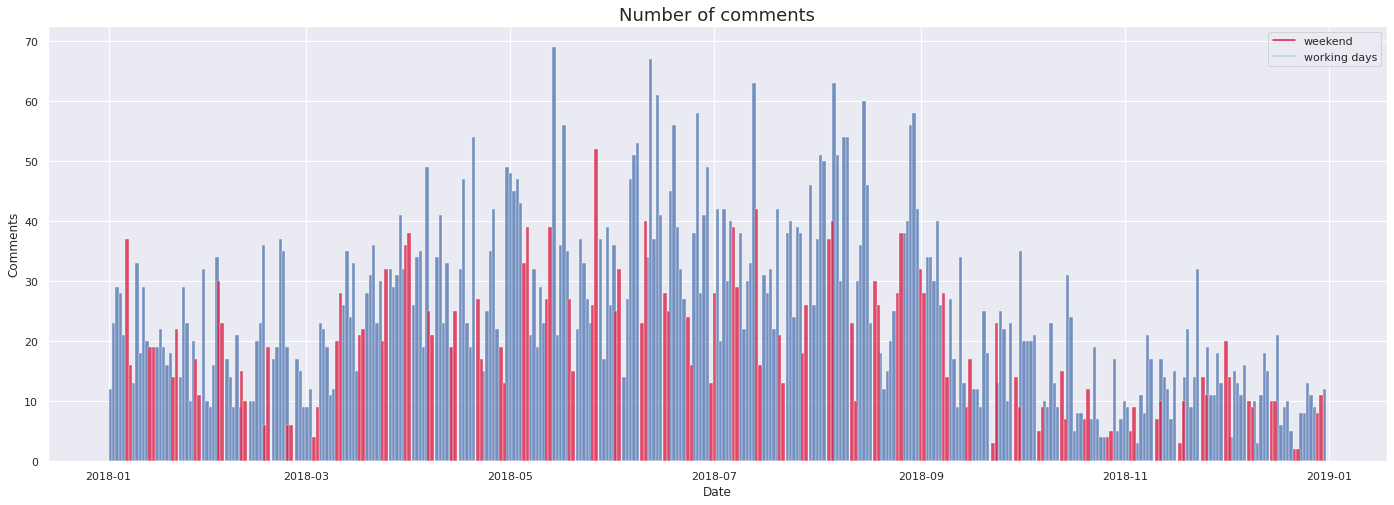

In [16]:
drawHistogram(gardening_comments, 'Number of comments', 'Comments', 'Date',2018)

<br><br>

## aviation.stack.exchange

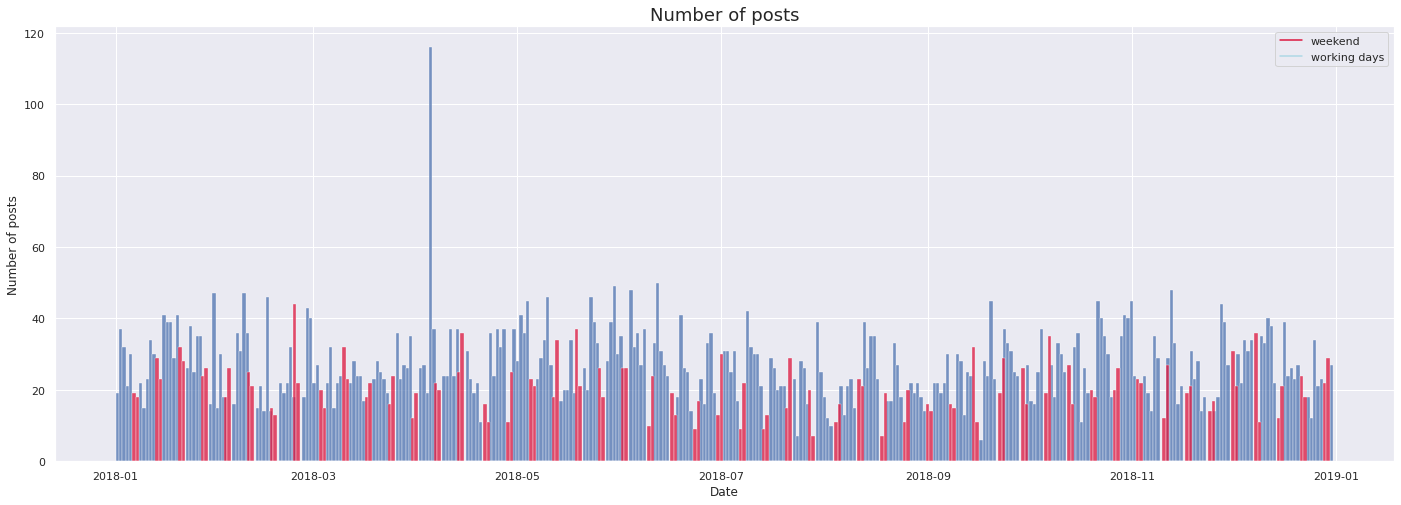

In [17]:
drawHistogram(aviation_posts, 'Number of posts', 'Number of posts', 'Date',2018)

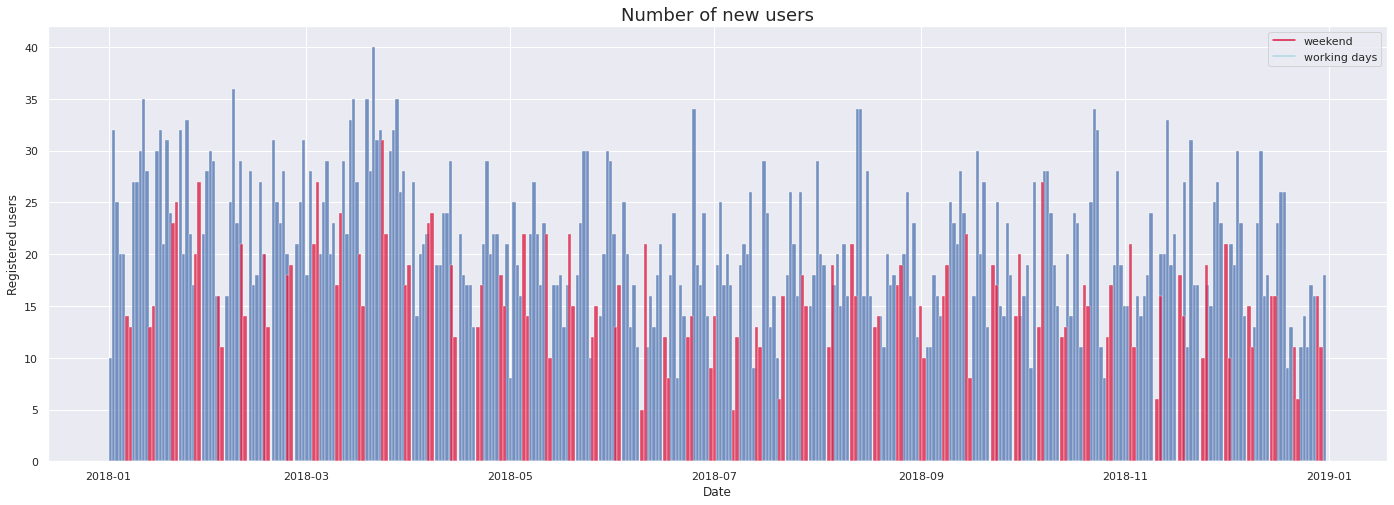

In [18]:
drawHistogram(aviation_users, 'Number of new users', 'Registered users', 'Date',2018)

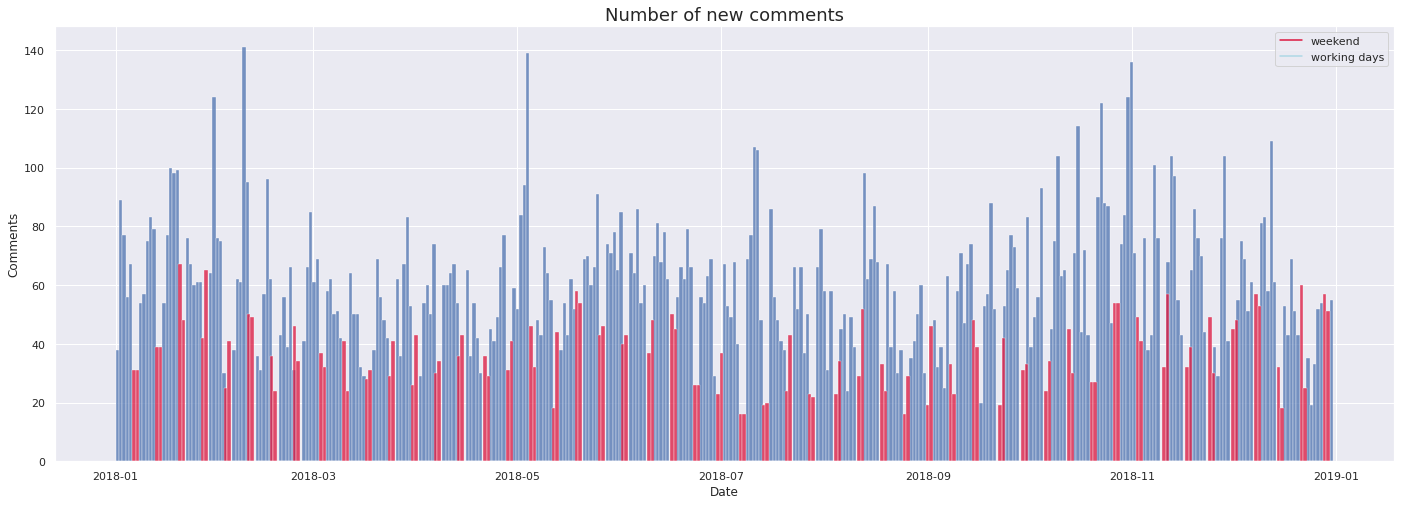

In [19]:
drawHistogram(aviation_comments, 'Number of new comments', 'Comments', 'Date',2018)

<br><br>

## health.stack.exchange

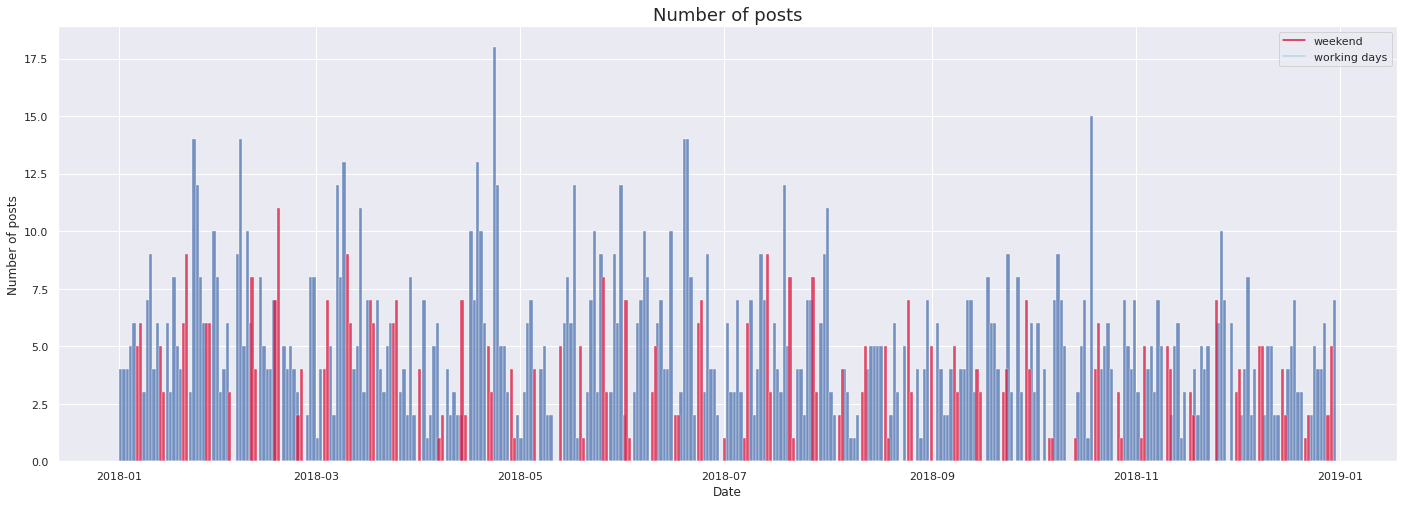

In [20]:
drawHistogram(health_posts, 'Number of posts', 'Number of posts', 'Date',2018)

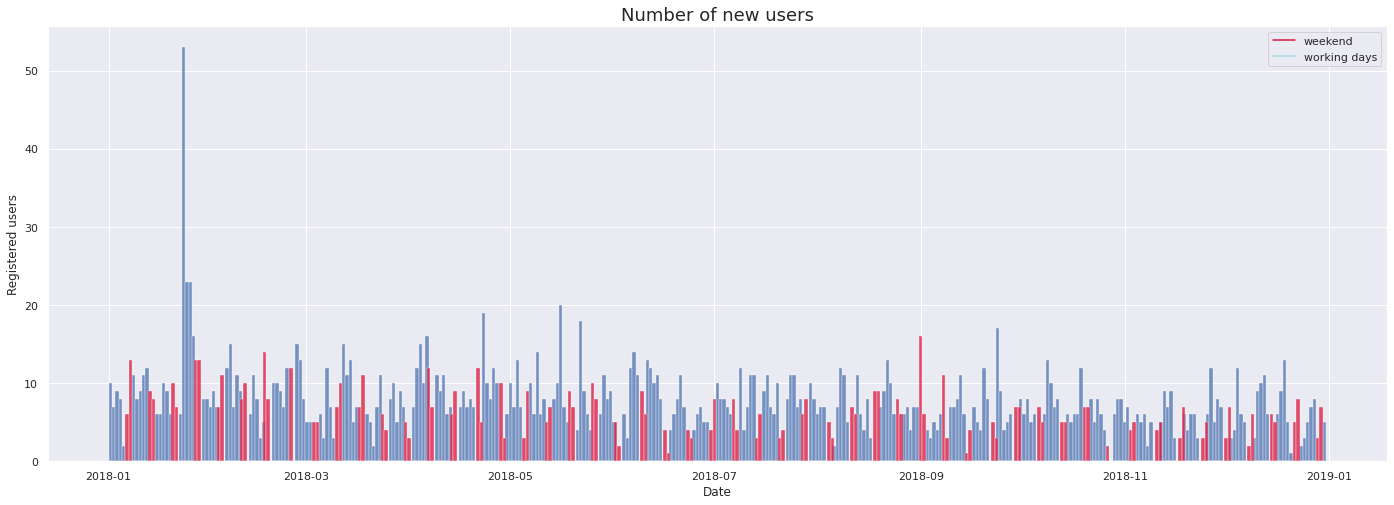

In [21]:
drawHistogram(health_users, 'Number of new users', 'Registered users', 'Date',2018)

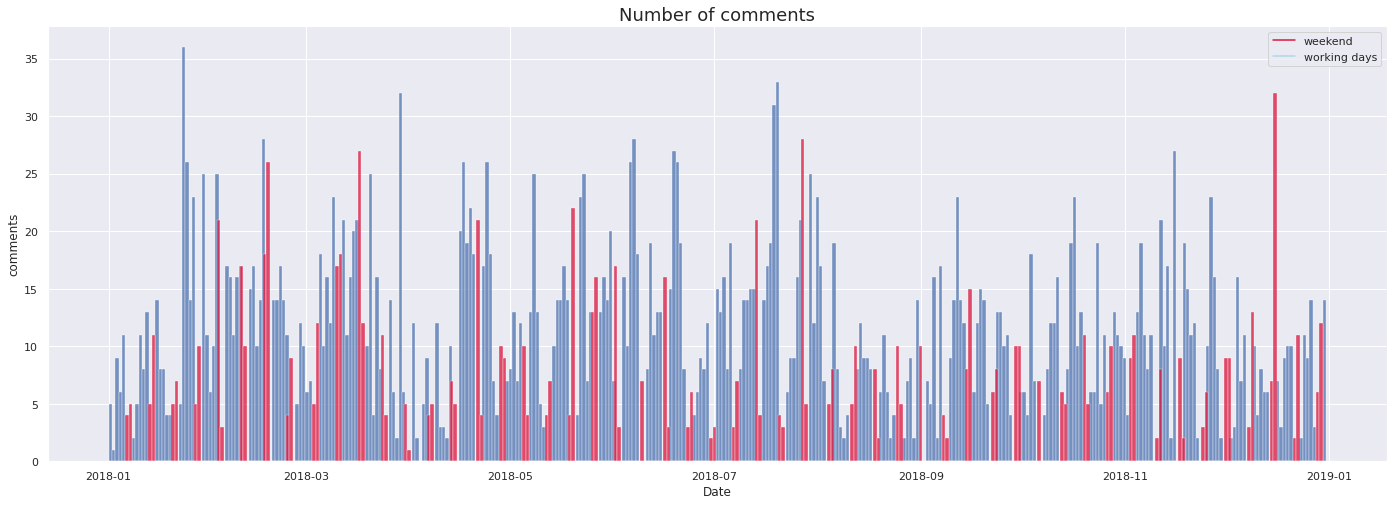

In [22]:
drawHistogram(health_comments, 'Number of comments', 'comments', 'Date',2018)

# Raspberry pi release dates

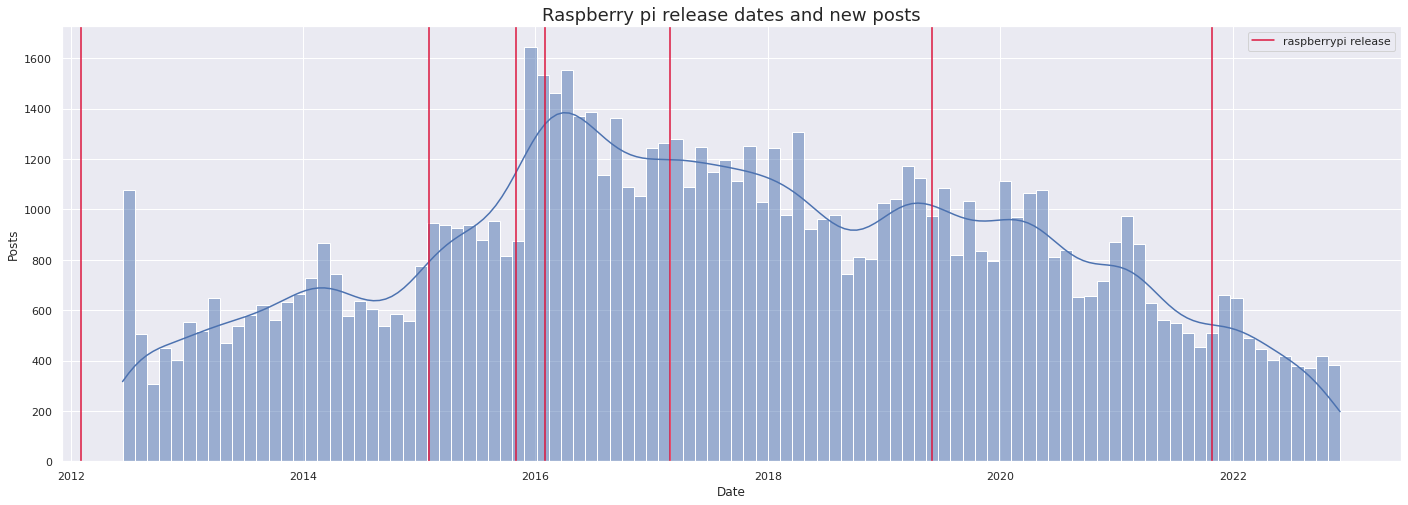

In [23]:
df = pd.DataFrame(pd.to_datetime(rpi_posts['CreationDate']).dt.date)
df.columns = ['Date']
df['Date'] = pd.to_datetime(df['Date'])

fig, ax = plt.subplots()
plot = sns.histplot(data = df, x="Date", fill = True, bins = 100, kde = True, )
ax.set(ylabel = 'Posts')
#The first-generation Raspberry Pi Model B was released in February 2012, followed by the simpler and cheaper Model A.
x = pd.to_datetime(['01022012'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#The Raspberry Pi 2 was released in February 2015 
x = pd.to_datetime(['01022015'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#A Raspberry Pi Zero with smaller size and reduced input/output (I/O) and general-purpose input/output (GPIO) capabilities was released in November 2015 for US$5.
x = pd.to_datetime(['01112015'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')


#The Raspberry Pi 3 Model B was released in February 2016 
x = pd.to_datetime(['01022016'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#On 28 February 2017, the Raspberry Pi Zero W was launched, a version of the Zero with Wi-Fi and Bluetooth capabilities, for US$10.[35][36]
x = pd.to_datetime(['28022017'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#The Raspberry Pi 4 Model B was released in June 2019[
x = pd.to_datetime(['01062019'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

#On 28 October 2021, the Raspberry Pi Zero 2 W
x = pd.to_datetime(['28102021'], format='%d%m%Y')
plt.axvline(x=x, color='crimson', linestyle='-')

b = plt.Line2D([], [], color='crimson', label='raspberrypi release')
plt.legend(handles=[b])
plt.title('Raspberry pi release dates and new posts', fontsize=18,)

plt.show()

In [24]:
# posts = Posts.loc[pd.isna(Posts["Title"]) == False, ['Title','OwnerUserId', 'CreationDate']]
# posts['CreationDate'] = pd.DataFrame(pd.to_datetime(posts['CreationDate']).dt.date)
# posts.columns = ['Title', 'OwnerUserId', 'Date']
# posts['Date'] = pd.to_datetime(posts['Date'])
# posts[posts['Date'] == '2015-02-15']

In [25]:
# Posts['CreationDate'] = pd.to_datetime(posts['Date'])
# posts[posts['Date'] == '2015-02-15']

# User countries

In [26]:
x = rpi_users[pd.isna(rpi_users['Location'] ) == False]
import random
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="aba")


def stringToCountry(address):
    try:
        location = geolocator.geocode(address, language = 'en')
        return location.raw['display_name'].split(',')[-1].lstrip()
    except:
        return None

location = list(x['Location'])
random.shuffle(location)

In [ ]:
#first 10000
countries = list(map(stringToCountry, location[:10000]))

countries


In [31]:
import pickle
pickle_out = open('user_countries','wb')
pickle.dump(countries, pickle_out)

In [32]:
unpickleFile = open('user_countries', 'rb')
user_countries = pickle.load(unpickleFile, encoding='bytes')

In [37]:
import geopandas as gpd
countries.plot()

AttributeError: 'list' object has no attribute 'plot'